In [1]:
# Install the yfinance library if you don't have it
# !pip install yfinance

In [13]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 10)


In [17]:
# Define the tickers and time period
tickers = ['TSLA', 'AAPL', 'AMZN']
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

In [19]:
# Download the stock data
stock_data = yf.download(tickers, start=start_date, end=end_date)

C:\Users\New\AppData\Local\Temp\ipykernel_30312\447513250.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


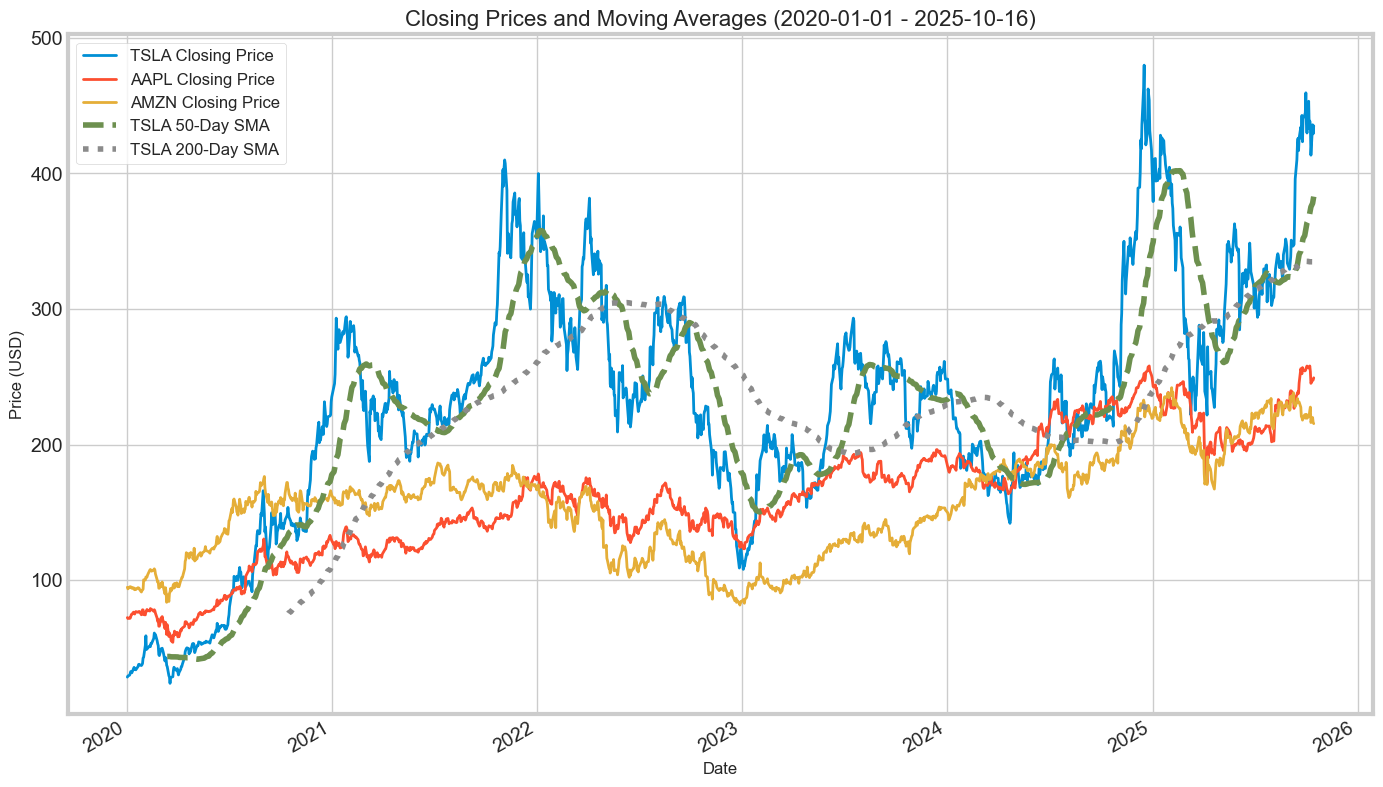

In [27]:
# --- 1. Closing Prices and Moving Averages ---
plt.figure()
for ticker in tickers:
    stock_data['Close'][ticker].plot(label=f'{ticker} Closing Price', linewidth=2)

# Calculate and plot moving averages for TSLA
stock_data['Close']['TSLA'].rolling(window=50).mean().plot(label='TSLA 50-Day SMA', linestyle='--')
stock_data['Close']['TSLA'].rolling(window=200).mean().plot(label='TSLA 200-Day SMA', linestyle=':')

plt.title(f'Closing Prices and Moving Averages ({start_date} - {end_date})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('closing_prices.png')
plt.show()


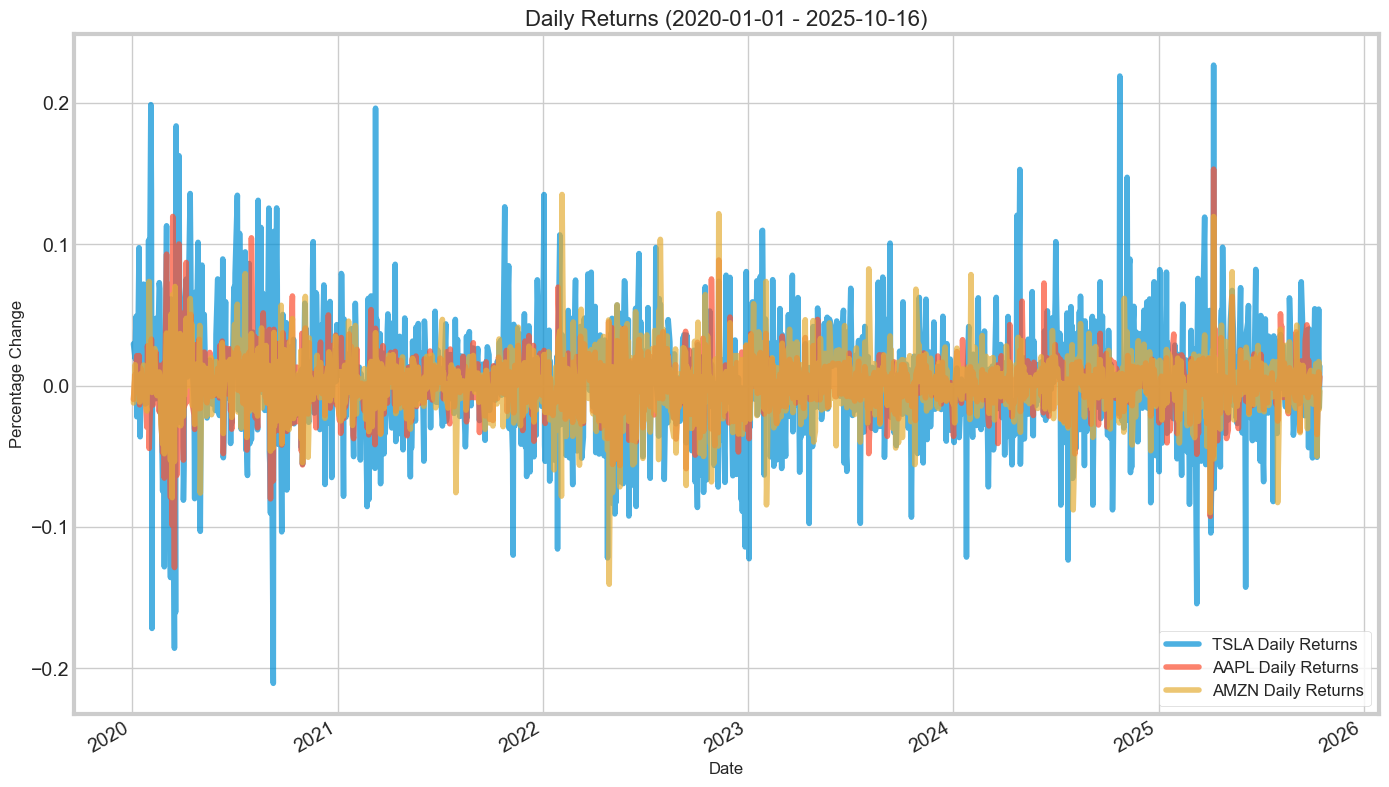

In [29]:
# --- 2. Daily Returns ---
daily_returns = stock_data['Close'].pct_change().dropna()

plt.figure()
for ticker in tickers:
    daily_returns[ticker].plot(label=f'{ticker} Daily Returns', alpha=0.7)

plt.title(f'Daily Returns ({start_date} - {end_date})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('daily_returns.png')
plt.show()


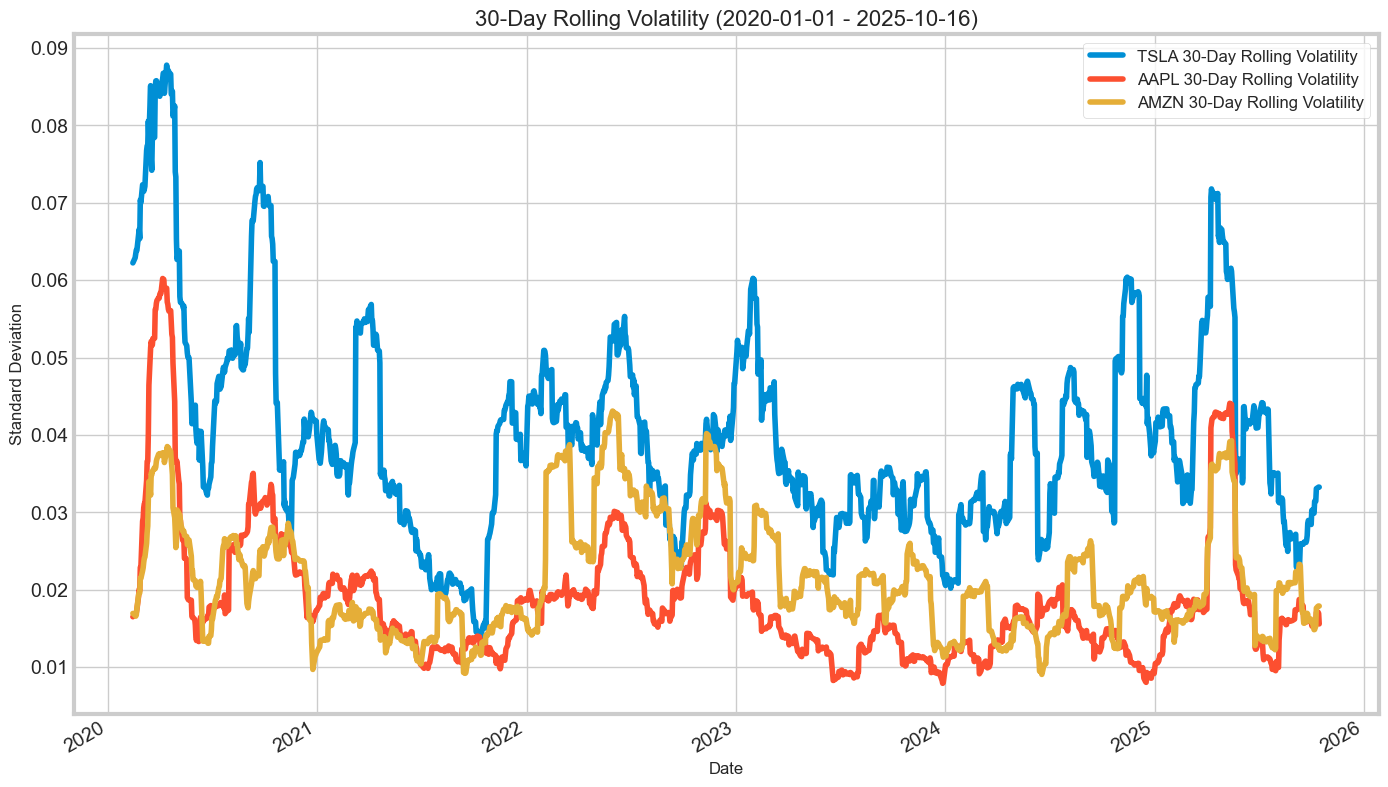

In [31]:
# --- 3. Volatility (Rolling Standard Deviation) ---
rolling_volatility = daily_returns.rolling(window=30).std()

plt.figure()
for ticker in tickers:
    rolling_volatility[ticker].plot(label=f'{ticker} 30-Day Rolling Volatility')

plt.title(f'30-Day Rolling Volatility ({start_date} - {end_date})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rolling_volatility.png')
plt.show()

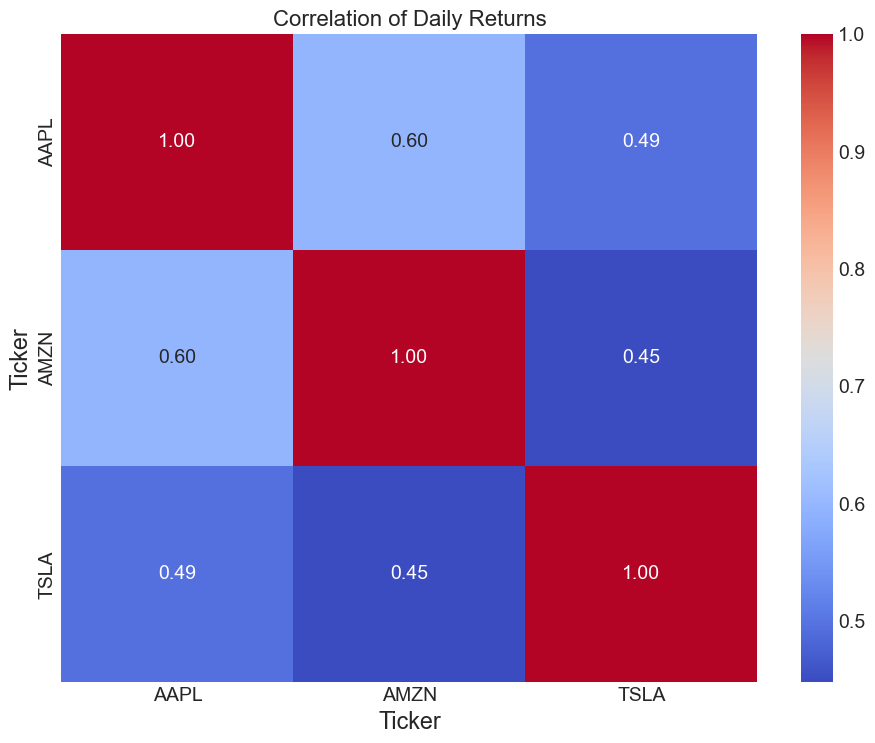

In [33]:
# --- 4. Correlation of Daily Returns ---
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Daily Returns', fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()


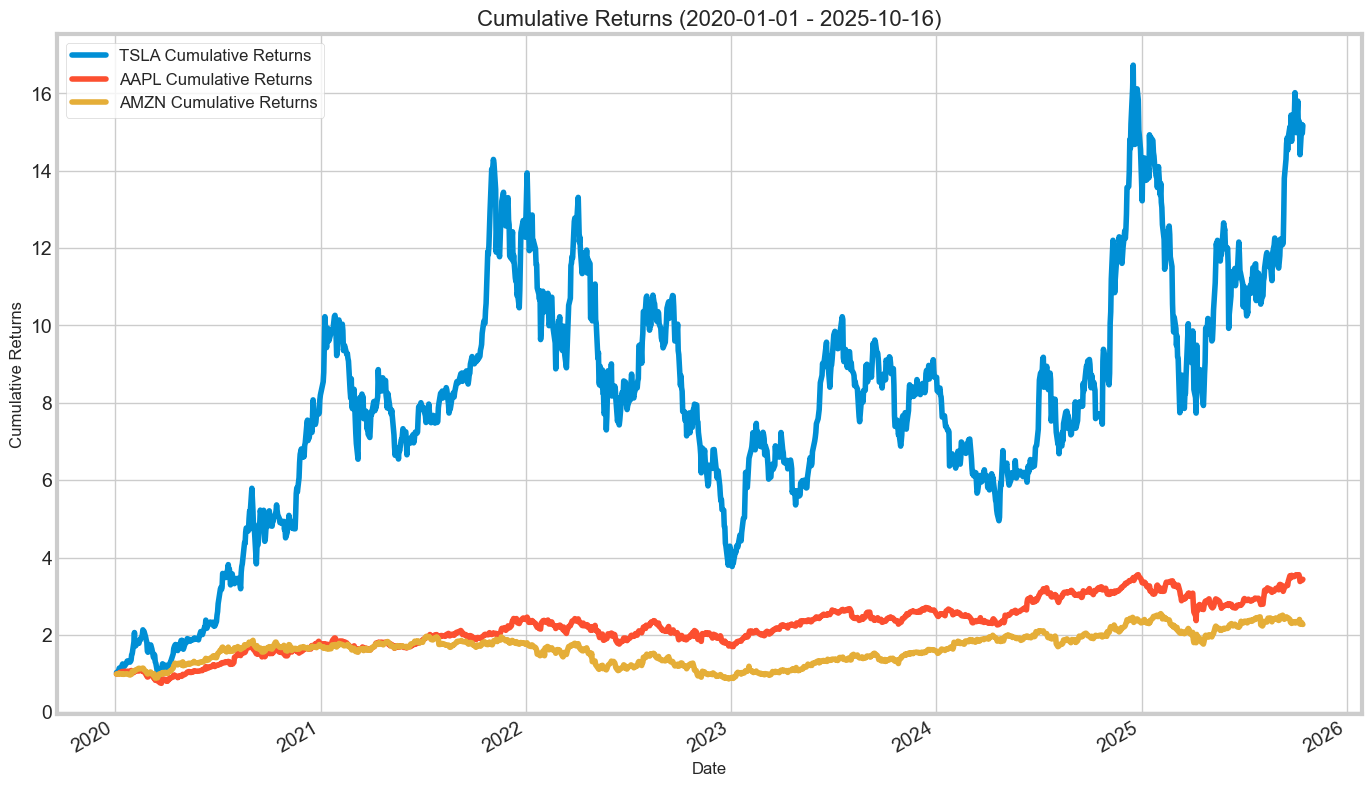

In [35]:
# --- 5. Cumulative Returns ---
cumulative_returns = (1 + daily_returns).cumprod()

plt.figure()
for ticker in tickers:
    cumulative_returns[ticker].plot(label=f'{ticker} Cumulative Returns')

plt.title(f'Cumulative Returns ({start_date} - {end_date})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('cumulative_returns.png')
plt.show()

***This analysis compared the performance of Tesla (TSLA), Apple (AAPL), and Amazon (AMZN) from 2020 to the present. The analysis of daily returns, volatility, and moving averages revealed that while all three tech stocks are positively correlated, Tesla exhibits significantly higher volatility. Cumulative return analysis highlighted the periods of rapid growth and correction for each stock.***